In [159]:
import seaborn as sns
import numpy as np
import pandas as pd
from math import sqrt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [160]:
station_columns = ["Day", "Time", "Id", "Latitude", "Longitude", "Total","Percent"]
station_data = pd.read_csv("station_result", sep = "\\s+", names = station_columns)
station_data.head(5)

,Day,Time,Id,Latitude,Longitude,Total,Percent
0,Fri,Morning,120,40.68676,-73.95929,19,0.02
1,Fri,Morning,143,40.69239,-73.99338,24,0.13
2,Fri,Morning,150,40.72087,-73.98086,31,0.05
3,Fri,Morning,157,40.69089,-73.99613,23,0.05
4,Fri,Morning,161,40.72917,-73.99811,35,0.15


In [6]:
# sns.lmplot(x = "Longitude", y = "Latitude", data = station_data, fit_reg=False)

In [161]:
traffic_columns = ["Latitude", "Longitude", "Day", "Time", "Speed"]
traffic_data = pd.read_csv("traffic_result_20", sep = "\\s+", names = traffic_columns)
traffic_data = traffic_data[(traffic_data["Latitude"] >= 40.65) & (traffic_data["Latitude"] <= 40.82) & (traffic_data["Longitude"] >= -74.02) & (traffic_data["Longitude"] <= -73.93)]
traffic_data.head(5)

,Latitude,Longitude,Day,Time,Speed
331,40.65889,-74.00278,Mon,Morning,13.0475
332,40.65889,-74.00278,Thu,Morning,11.4950
333,40.65889,-74.00278,Tue,Morning,10.8750
334,40.65889,-74.00278,Tue,Night,18.0200
335,40.65889,-74.00278,Wed,Morning,14.2900


In [10]:
# sns.lmplot(x = "Longitude", y = "Latitude", data = traffic_data, fit_reg=False)

In [162]:
trip_columns = ["Id", "Day", "Time", "Rate"]
trip_data = pd.read_csv("trip_result", sep = "\\s+", names = trip_columns)
trip_data.head(5)

,Id,Day,Time,Rate
0,116,Mon,Night,-3
1,116,Thu,Morning,-1
2,116,Tue,Night,-2
3,116,Wed,Night,-2
4,119,Tue,Morning,-1


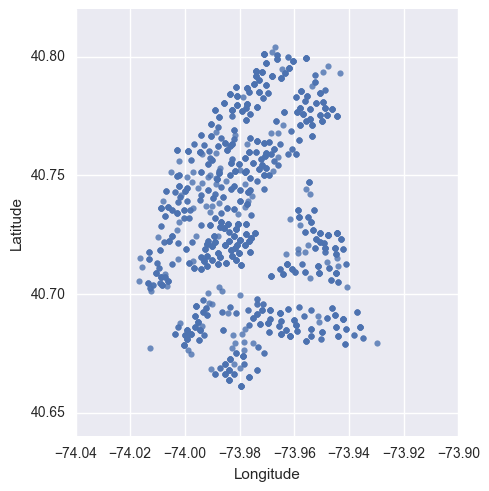

In [163]:
bike_data = pd.merge(station_data, trip_data, on = ["Id", "Time", "Day"], how="inner")
sns.lmplot(x = "Longitude", y = "Latitude", data = bike_data, fit_reg=False)

In [164]:
bike_data.head(5)

,Day,Time,Id,Latitude,Longitude,Total,Percent,Rate
0,Fri,Morning,120,40.68676,-73.95929,19,0.02,-1
1,Fri,Morning,150,40.72087,-73.98086,31,0.05,-6
2,Fri,Morning,157,40.69089,-73.99613,23,0.05,-1
3,Fri,Morning,174,40.73817,-73.97739,30,0.03,-6
4,Fri,Morning,2009,40.71117,-73.99683,35,0.12,-4


In [ ]:
# Analyse Mon Morning

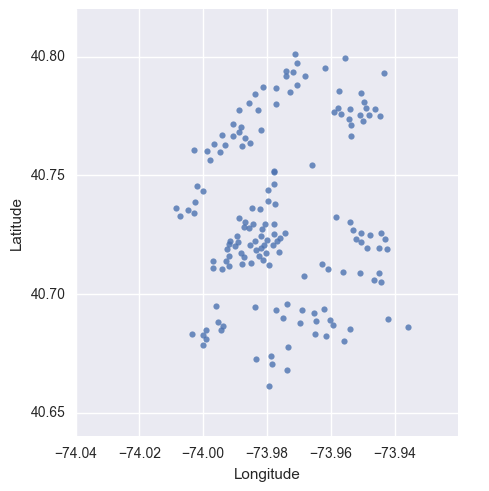

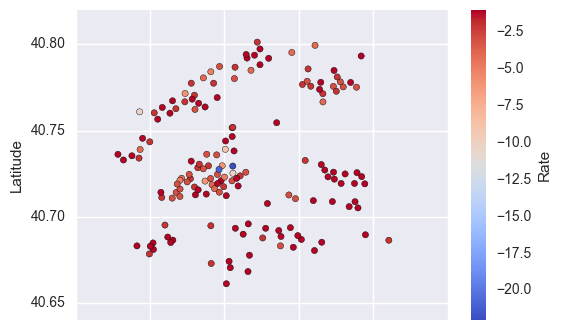

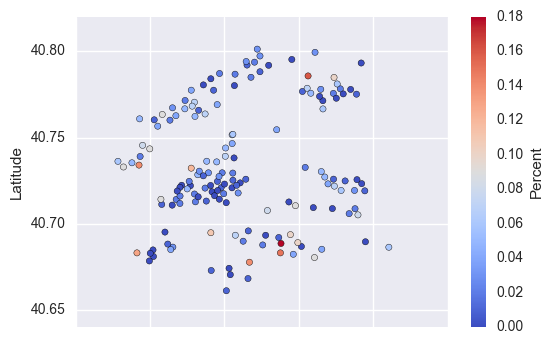

In [165]:
bike_mon_morning = bike_data[(bike_data['Day'] == 'Mon') & (bike_data['Time'] == 'Morning')]
sns.lmplot(x = "Longitude", y = "Latitude", data = bike_mon_morning, fit_reg=False)
bike_mon_morning.plot.scatter(x='Longitude',y='Latitude',c='Rate',cmap='coolwarm')
bike_mon_morning.plot.scatter(x='Longitude',y='Latitude',c='Percent',cmap='coolwarm')

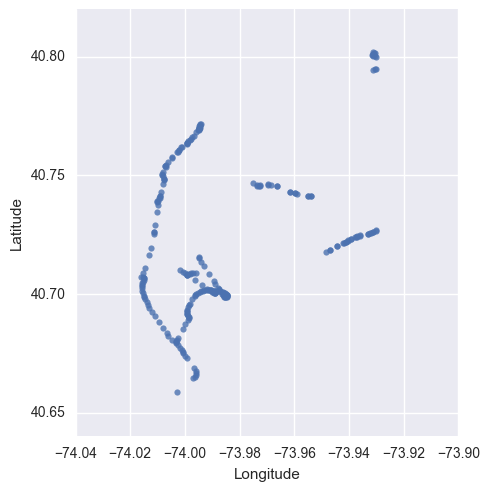

In [26]:
traffic_mon_morning = traffic_data[(traffic_data['Day'] == 'Mon') & (traffic_data['Time'] == 'Morning')]
sns.lmplot(x = "Longitude", y = "Latitude", data = traffic_mon_morning, fit_reg=False)

In [ ]:
# Combine latitude and longitude of two dataset into one

In [166]:
bike_point = bike_mon_morning[["Latitude", "Longitude"]]
bike_type = ["Bike"] * len(bike_point["Latitude"])
bike_point["Type"] = pd.Series(data = bike_type, index = bike_point.index)

traffic_point = traffic_mon_morning[["Latitude", "Longitude"]]
traffic_type = ["Traffic"] * len(traffic_point["Latitude"])
traffic_point["Type"] = pd.Series(data = traffic_type, index = traffic_point.index)


/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [167]:
traffic_point.head(5)

,Latitude,Longitude,Type
331,40.65889,-74.00278,Traffic
367,40.66456,-73.99690,Traffic
383,40.66513,-73.99642,Traffic
425,40.66599,-73.99600,Traffic
477,40.66661,-73.99591,Traffic


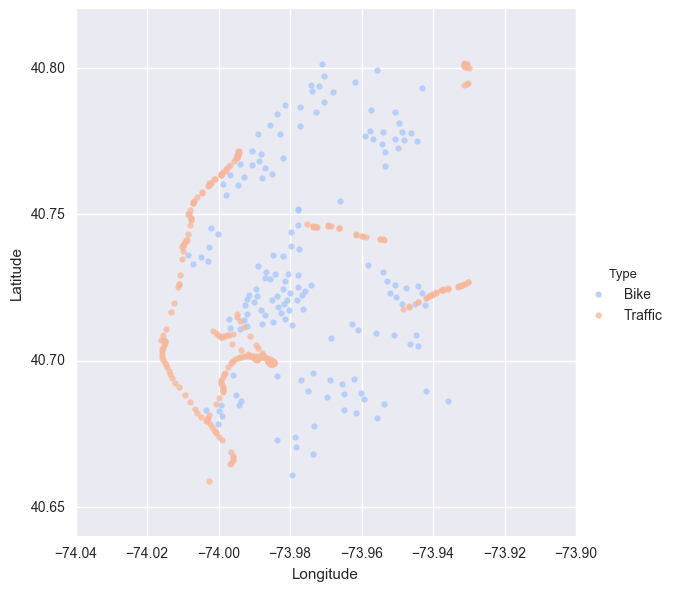

In [168]:
combine_point = pd.concat([bike_point, traffic_point])
sns.lmplot(x = "Longitude", y = "Latitude", data = combine_point, fit_reg=False, hue="Type", palette="coolwarm", size=6, aspect=1)

In [132]:
def combineThreeFactor(percent, rate, dist):
    min_rate = -bike_mon_morning["Rate"].min() - 1
    print (min_rate)
    return (((0.2 - percent) * 2) + (-rate + 1) * (0.4 / min_rate) + dist)

In [142]:
def getScoreFromPoint (bike_data, traffic_data):
    lst = []
    for i in range(len(bike_data)):
        bike_latitude = bike_data.iloc[i]["Latitude"]
        bike_longtitude = bike_data.iloc[i]["Longitude"]
        min_dis = 1
        score = 0
        for j in range(len(traffic_data)):
            traffic_latitude = traffic_data.iloc[j]["Latitude"]
            traffic_longitude = traffic_data.iloc[j]["Longitude"]
            dis = sqrt((bike_latitude - traffic_latitude) ** 2 + (bike_longtitude - traffic_longitude) ** 2)
            min_dis = min(dis, min_dis)
        if min_dis >= 0.002:
            score = 0.2
        else:
            score = (min_dis / 0.002) * 0.2
        lst.append(score)
    return lst

In [169]:
bike_mon_morning["trafficScore"] = getScoreFromPoint(bike_mon_morning, traffic_mon_morning)

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [171]:
bike_mon_morning.head(5)

,Day,Time,Id,Latitude,Longitude,Total,Percent,Rate,trafficScore
288,Mon,Morning,120,40.68676,-73.95929,19,0.00,-1,0.2
289,Mon,Morning,150,40.72087,-73.98086,31,0.01,-1,0.2
290,Mon,Morning,174,40.73817,-73.97739,30,0.00,-1,0.2
291,Mon,Morning,2009,40.71117,-73.99683,35,0.01,-2,0.2
292,Mon,Morning,236,40.72841,-73.98714,39,0.05,-2,0.2


In [172]:
bike_mon_morning["Score"] = combineThreeFactor(bike_mon_morning["Percent"], bike_mon_morning["Rate"], bike_mon_morning["trafficScore"])

21


/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [189]:
bike_mon_morning.sort_values(by = "Score", ascending=False, inplace=True)

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


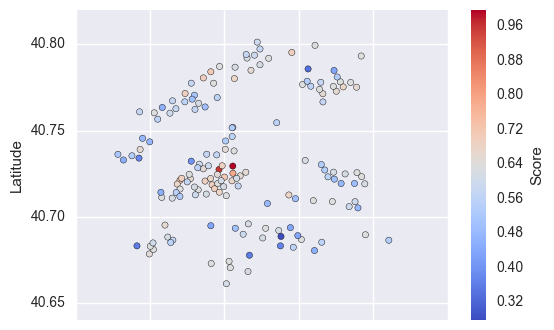

In [190]:
bike_mon_morning.plot.scatter(x='Longitude',y='Latitude',c='Score',cmap='coolwarm')

In [191]:
lst = range(10)

In [192]:
top_10_score = bike_mon_morning.iloc[lst]

In [193]:
top_10_score

,Day,Time,Id,Latitude,Longitude,Total,Percent,Rate,trafficScore,Score
436,Mon,Morning,511,40.72938,-73.97773,33,0.02,-22,0.2,0.998095
417,Mon,Morning,445,40.72740,-73.98143,42,0.03,-21,0.2,0.959048
402,Mon,Morning,394,40.72521,-73.97769,32,0.01,-10,0.2,0.789524
347,Mon,Morning,3178,40.78414,-73.98363,39,0.00,-5,0.2,0.714286
424,Mon,Morning,473,40.72110,-73.99193,38,0.00,-5,0.2,0.714286
401,Mon,Morning,393,40.72299,-73.97996,31,0.00,-5,0.2,0.714286
390,Mon,Morning,349,40.71850,-73.98330,23,0.00,-4,0.2,0.695238
393,Mon,Morning,356,40.71622,-73.98262,23,0.00,-4,0.2,0.695238
368,Mon,Morning,3341,40.79534,-73.96186,59,0.00,-4,0.2,0.695238
340,Mon,Morning,3166,40.78057,-73.98563,41,0.00,-4,0.2,0.695238


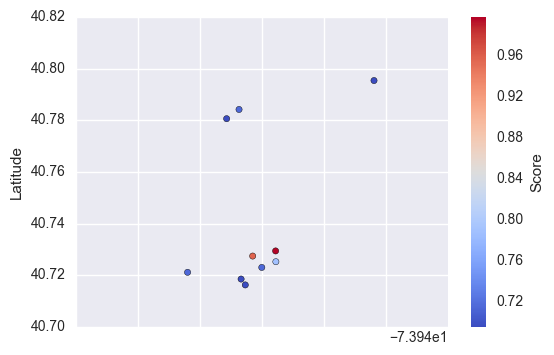

In [194]:
top_10_score.plot.scatter(x='Longitude',y='Latitude',c='Score',cmap='coolwarm')

In [195]:
# top10s = []

In [196]:
def addToTop():
    lst = []
    for i in range(10):
        latitude = top_10_score.iloc[i]["Latitude"]
        longtitude = top_10_score.iloc[i]["Longitude"]
        lst.append((latitude, longtitude))
    top10s.append(lst)

In [198]:
addToTop()

In [202]:
top10s[0]

[(40.729379999999999, -73.977730000000008),
 (40.727400000000003, -73.981430000000003),
 (40.725209999999997, -73.977689999999996),
 (40.784140000000001, -73.983630000000005),
 (40.7211, -73.991930000000011),
 (40.722990000000003, -73.979959999999991),
 (40.718499999999999, -73.9833),
 (40.71622, -73.982619999999997),
 (40.795340000000003, -73.961860000000001),
 (40.780570000000004, -73.98563)]